Importamos las librerias que se vana  usar.

In [1]:
import pandas as pd
import collections
from collections import Counter


import numpy as np
import scipy as sc
%matplotlib inline
import matplotlib.pyplot as plt

Asignamos variables a las bases de datos.

In [2]:
datosMayo = pd.read_csv('2017-05.csv', header = 0)
datosJunio = pd.read_csv('2017-06.csv', header = 0)
datosJulio = pd.read_csv('2017-07.csv', header = 0)

C:\Users\Lorena\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


La siguiente función crea una lista que contiene los valores de cada una de las columna en la base de datos.

asigvariables [0] = Lista de Edad

&nbsp;
              asigvariables[1] = Lista de Fecha de Retiro
              
&nbsp;
              asigvariables[2] = Lista de Fecha de Arribo
              
&nbsp;
              asigvariables[3] = Lista de Hora de Retiro
              
&nbsp;
              asigvariables[4] = Lista de Hora de Arribo
              
&nbsp;
              asigvariables[5] = Lista de Estación de Retiro
              
&nbsp;
              asigvariables[6] = Lista de Estación de Arribo
              
&nbsp;
              asigvariables[7] = Lista de Fecha de Retiro
              
&nbsp;
              asigvariables[8] = Lista de Fecha de Arribo
              
&nbsp;
              asigvariables[9] = Lista de Género 

In [3]:
def asigvariable (d):
    Edad = d['Edad_Usuario']
    F_R = d['Fecha_Retiro']
    F_A = d['Fecha_Arribo']
    H_R = d['Hora_Retiro']
    H_A = d['Hora_Arribo']
    E_R = d['Ciclo_Estacion_Retiro']
    E_A = d['Ciclo_Estacion_Arribo']
    F_R = d['Fecha_Retiro']
    F_A = d['Fecha_Arribo']
    Genero = d['Genero_Usuario']
    return Edad, F_R, F_A, H_R, H_A, E_R, E_A, F_R, F_A, Genero
    

In [4]:
Mayo = asigvariable(datosMayo)
Junio = asigvariable(datosJunio)
Julio = asigvariable(datosJulio)

Definimos algunas funciones que usaremos para el análisis.


La función "horas" convierte el formato de horas en un número para poder trabajar con el como número y no como string.

La función "frec" cuenta las veces que se repite cierta hora.

La función "Max" da el número de la ciclo estación que tuvo más de cierto número F de retiros o arribos, da también el número de retiro o arribos que tuvo.

La función "trayectos" da el número de veces que se usa cada trayecto, es decir, si la bici se retira en la ciclo estación 1 y se entrega en la 27 el trayecto es (1, 27), la función cuenta cuantas veces se utilzó ese trayecto.

La función "cont" los trayectos que han sido usados más de un número X de veces.

La función "matriz" imprime una matriz de 452 X 452 cada entrada de la matríz corresponde a un trayecto y en cada entrada imprime el número de veces que se ha usado ese trayecto (hay muchos que no se usan y su valor es cero).


In [5]:
def horas(l):
    mm = [] 
    ss = []
    for i in range(len(l)):
        a = l[i]
        if len(a) == 8:
            b = a[0]
            c = a[1]
            d = a[3]
            e = a[4]
            f = a[6]
            g = a[7]
        if len(a) == 7:
            b = '0'
            c = a[0]
            d = a[2]
            e = a[3]
            f = a[5]
            g = a[6]
        v = b + c + d + e + f + g
        t = b + c + d + e
        tt = int(t)
        vv = int(v)
        ss.append(vv)
        mm.append(tt)
    mm.sort()
    ss.sort()
    return mm, ss

def frec(l):
    v = Counter(l)
    j = list(v.items())
    jj = sorted(j)
    dato = []
    frecuencia = []
    for i in range(len(jj)):
        #print (jj[i])
        j0 = jj[i][0]
        j1 = jj[i][1]
        dato.append(j0)
        frecuencia.append(j1)
    return jj, dato, frecuencia

def Max(l, F=6000):
    maximo = []
    for i in range(len(l)):
        if l[i][1] > F:
            print (l[i])
            maximo.append(l[i])
    return maximo

def trayectos(li, M = 453):
    d = {}
    o = []
    for i in range(1, M):
        for j in range(1, M):
            d[i,j] = 0
    for i in range(len(li)):
        if li[i][0] > M or li[i][1] > M:
            n = li[i]
            o.append(n)
        else:
            a = d[li[i]]
            b = a + 1
            d[li[i]] = b
    return d

def cont(d, M=200, m=453):
    f = {}
    for i in range(1,m):
        for j in range(1,m):
            if d[i, j] > M:
                f[i,j] = d[i,j]
                #print ('(',i,',', j,')', '=', d[i,j])
    return f

def matriz(d, M = 453):
    for i in range(1,M):
        l = [i]
        for j in range(1, M):
            l.append(d[i,j])
        print (l)
    return l

Más funciones.

La función "comp"compara el número de trayectos en los últimos dos meses. E imprime las estaciones entre las que se hizo el viaje y el número de viajes hechos cada mes. En este caso está hecho sólo comparanado los trayectos que se usaron más de 200 veces en el mes.

La función "fechas" agrupa el número de veces que se usa una estación al día. Para Tener los últimos tres meses juntos, el primero de Mayo corresponde al 1, el 1 de Junio corresponde al número 32 (1 + 31 días de Mayo) y el 1 de Julio corresponde al 62 ( 1 + 31 días de Mayo + 30 días de Junio).

La función "est" toma los datos de una cierta estación X y los prepara para graficarlos, como resultado da dos listas, la primera se refiere al número de ecobicis usados cada día y la segunda el día que se está analisando. Además analisa si el uso de ecobicis aumentó o disminuyó en los últimos 3 meses.

La función "semana" quita los fines de semana de la lista de días.

In [6]:
def comp(d1, d2, d3, M=453):
    for i in range(1,M):
        for j in range(1,M):
            if (i,j) in d1 and (i,j) in d2 and (i,j) in d3:
                if d2[i,j] < d3[i,j]:
                    print ('(', i, ',', j, ')', d1[i,j], d2[i,j], d3[i,j], 'Aumentó')
                else:
                     print ('(', i, ',', j, ')', d1[i,j], d2[i,j], d3[i,j], 'Disminuyó')
            if (i,j) in d1 and (i,j) in d2 and (i,j) not in d3:
                print ('(', i, ',', j, ')', d1[i,j], d2[i,j], '-', 'Disminuyó')
            if (i,j) in d1 and (i,j) not in d2 and (i,j) in d3:
                 print ('(', i, ',', j, ')', d1[i,j], '-', d3[i,j], 'Aumentó')
            if (i,j) not in d1 and (i,j) in d2 and (i,j) in d3:
                if d2[i,j] < d3[i,j]:
                    print ('(', i, ',', j, ')', '-' , d2[i,j], d3[i,j], 'Aumentó')
                else:
                    print ('(', i, ',', j, ')', '-' , d2[i,j], d3[i,j], 'Disminuyó')
            if (i,j) in d1 and (i,j) not in d2 and (i,j) not in d3:
                print ('(', i, ',', j, ')', d1[i,j], '-', '-', 'Disminuyó')
            if (i,j) not in d1 and (i,j) in d2 and (i,j) not in d3:
                print ('(', i, ',', j, ')', '-' ,d2[i,j], '-', 'Disminuyó')
            if (i,j) not in d1 and (i,j) not in d2 and (i,j) in d3:
                print ('(', i, ',', j, ')', '-', '-', d3[i,j], 'Aumentó')
                
def fechas(l1,l2,l3, M=93, m=453):
    mm = []
    n = {}
    for i in range(1, M):
        for j in range(1, m):
            n[i,j] = 0
    for i in range(len(l1)):
        a = l1[i][0]
        b = a[0]
        c = a[1]
        t = b + c 
        tt = int(t)
        j1 = (tt, l1[i][1])
        j2 = (tt, l1[i][2])
        mm.append(j1)
        mm.append(j2)
    for i in range(len(l2)):
        a = l2[i][0]
        b = a[0]
        c = a[1]
        t = b + c 
        tt = int(t) + 31
        j1 = (tt, l2[i][1])
        j2 = (tt, l2[i][2])
        mm.append(j1)
        mm.append(j2)
    for i in range(len(l3)):
        a = l3[i][0]
        b = a[0]
        c = a[1]
        t = b + c 
        tt = int(t) + 61
        j1 = (tt, l3[i][1])
        j2 = (tt, l3[i][2])
        mm.append(j1)
        mm.append(j2)
    for i in range(1,len(mm)):
        if mm[i] in n:
            g = n[mm[i]]
            gg = g + 1
            n[mm[i]] = gg
    for i in range(1,M):
        for j in range(1,m):
            if n[i,j] == 0:
                del n[i,j]
    return mm, n

def est(e, l):
#def est(e, l=b[1]):
    k = []
    u = []
    M = []
    Jn = []
    Jl = []
    o = 0
    oo = '-'
    for i in range(1,93):
        if (i,e) in l:
            f = l[i,e]
            k.append(f)
            u.append(i)
            if i < 32:
                M.append(f)
            if 31 < i and i < 62:
                Jn.append(f)
            if 61 < i:
                Jl.append(f)
        else:
            k.append(0)
            u.append(i)
    if sum(M) < sum(Jn) and sum(Jn) < sum(Jl):
        oo = 'El uso en la estación:', e, 'siempre crece'
        o = 1
    if sum(M) < sum(Jn) and sum(Jn) > sum(Jl):
        oo ='El uso en la estación:', e,'Creció de Mayo a Junio'
        o = 2
    if sum(M) > sum(Jn) and sum(Jn) < sum(Jl):
        oo = 'El uso en la estación:', e,'Creció de Junio a Julio'
        o = 3
    if sum(M) > sum(Jn) and sum(Jn) > sum(Jl):
        oo = 'El uso en la estación:', e,'Siempre disminuye'
        o = 4
    mensual = (sum(M), sum(Jn), sum(Jl))
    return k, u , o, oo, mensual

def semana(l):
    ll1 = []
    ll2 = []
    m6y7 = []
    for i in range(1,18):
        k = i*6
        u = i*7
        m6y7.append(k)
        m6y7.append(u)
    for i in range(len(l[1])):
        if l[1][i] not in m6y7:
            a1 = (l[1][i])
            a2 = (l[0][i])
            ll1.append(a1)
            ll2.append(a2)
    return ll1, ll2


Las siguientes 6 celdas son asignacion de variables a los resultados de aplicar algunas de las funciones anteriores a las bases de datos para poder graficar la frecuencia con la que se piden ecobicis a cada hora y ver que hora tiene una mayor demanda.

In [ ]:
H_R_Mayo = horas(Mayo[3])
H_R_Junio = horas(Junio[3])
H_R_Julio = horas(Julio[3])

In [ ]:
H_A_Mayo = horas(Mayo[4])
H_A_Junio = horas(Junio[4])
H_A_Julio = horas(Julio[4])

In [ ]:
frec_HR_Mayo = frec(H_R_Mayo[0])
frec_HR_Junio = frec(H_R_Junio[0])
frec_HR_Julio = frec(H_R_Julio[0])

In [ ]:
frec_HA_Mayo = frec(H_A_Mayo[0])
frec_HA_Junio = frec(H_A_Junio[0])
frec_HA_Julio = frec(H_A_Julio[0])

In [ ]:
HR_Mayo = frec_HR_Mayo[1]
f_HR_Mayo = frec_HR_Mayo[2]

HR_Junio = frec_HR_Junio[1]
f_HR_Junio = frec_HR_Junio[2]

HR_Julio = frec_HR_Julio[1]
f_HR_Julio = frec_HR_Julio[2]

In [ ]:
HA_Mayo = frec_HA_Mayo[1]
f_HA_Mayo = frec_HA_Mayo[2]

HA_Junio = frec_HA_Junio[1]
f_HA_Junio = frec_HA_Junio[2]

HA_Julio = frec_HA_Julio[1]
f_HA_Julio = frec_HA_Julio[2]

Ahora contruimos dos gráficas, en el eje X ponemos la hora donde 0001 es las doce de la noche con un minuto y 2359 son las 11 de la noche con 59 minutos y en el eje Y ponemos la frecuencia (es decir cuántas bicis de pidieron). La primera gráfica representa los retiros de Ecobicis y la segunda los arribos.

&nbsp;
En rojo están graficados los datos de Mayo, en azul los datos de Junio y en verde los datos de Julio.

In [ ]:
fig1=plt.figure(figsize=(15,11))
plt.plot(HR_Mayo , f_HR_Mayo,'r--', HR_Junio, f_HR_Junio, 'b--', HR_Julio, f_HR_Julio, 'g--')
plt.xlabel('Hora')
plt.ylabel('Frecuencia Retiros')
plt.xlim(0, 2400)
plt.ylim(0, 2000)

fig1=plt.figure(figsize=(15,11))
plt.plot(HA_Mayo , f_HA_Mayo,'r--', HA_Junio, f_HA_Junio, 'b--', HA_Julio, f_HA_Julio, 'g--')
plt.xlabel('Hora')
plt.ylabel('Frecuencia Arribos')
plt.xlim(0, 2400)
plt.ylim(0, 1900)

Las siguientes 4 celdas son asignación de variables a los resultados de aplicar funciones a las bases de datos para luego graficar la frecuencia con la que se piden ecobicis de cada una de las estaciones y además tener una lista con las estaciones en las que hay mayor demanda de ecobicis.

In [ ]:
frec_ER_Mayo = frec(Mayo[5])
frec_ER_Junio = frec(Junio[5])
frec_ER_Julio = frec(Julio[5])

In [ ]:
frec_EA_Mayo = frec(Mayo[6])
frec_EA_Junio = frec(Junio[6])
frec_EA_Julio = frec(Julio[6])

In [ ]:
ER_Mayo = frec_ER_Mayo[1]
f_ER_Mayo = frec_ER_Mayo[2]

ER_Junio = frec_ER_Junio[1]
f_ER_Junio = frec_ER_Junio[2]

ER_Julio = frec_ER_Julio[1]
f_ER_Julio = frec_ER_Julio[2]

In [ ]:
EA_Mayo = frec_EA_Mayo[1]
f_EA_Mayo = frec_EA_Mayo[2]

EA_Junio = frec_EA_Junio[1]
f_EA_Junio = frec_EA_Junio[2]

EA_Julio = frec_EA_Julio[1]
f_EA_Julio = frec_EA_Julio[2]

In [ ]:
#print ('Retiros Mayo')
ER_M = Max(frec_ER_Mayo[0])
#print ('Arribos Mayo')
EA_M = Max(frec_EA_Mayo[0])

#print ('Retiros Junio')
ER_Jn = Max(frec_ER_Junio[0])
#print ('Arribos Junio')
EA_Jn = Max(frec_EA_Junio[0])

#print ('Retiros Julio')
ER_Jl = Max(frec_ER_Julio[0])
#print ('Arribos Julio')
EA_Jl = Max(frec_EA_Julio[0])



Ahora construimos dos gráficas, en el eje X ponemos el número de la ciclo estación y en el eje Y la frecuencia (el número de bicis que se retiran o entregan en esa ciclo estación). La primera gráfica representa los retiros de Ecobicis y la segunda los arribos.

&nbsp;
En rojo están graficados los datos de Mayo, en azul los datos de Junio y en verde los datos de Julio.

In [ ]:
fig1=plt.figure(figsize=(15,11))
plt.plot(ER_Mayo , f_ER_Mayo,'r--', ER_Junio, f_ER_Junio, 'b--', ER_Julio, f_ER_Julio, 'g--')
plt.xlabel('Estación')
plt.ylabel('Frecuencia Retiros')
plt.xlim(0, 450)
plt.ylim(0, 11000)

fig1=plt.figure(figsize=(15,11))
plt.plot(EA_Mayo , f_EA_Mayo,'r--', EA_Junio, f_EA_Junio, 'b--', EA_Julio, f_EA_Julio, 'g--')
plt.xlabel('Estación')
plt.ylabel('Frecuencia Arribos')
plt.xlim(0, 450)
plt.ylim(0, 11000)

Las siguientes 6 celdas es asignación de valores a variables para hacer el análisis de cuales son los trayectos que más realizan en cada mes. 
El programa da una lista de los trayectos que mas se hacen si es que sobre pasan en alguno de los meses un número X (en este caso 200) de viajes.

In [9]:
CER_M = Mayo[5]
CEA_M = Mayo[6]
trayectos_Mayo = []

for i in range(len(CER_M)):
    a = (CER_M[i],CEA_M[i])
    trayectos_Mayo.append(a)

In [11]:
CER_Jn = Junio[5]
CEA_Jn = Junio[6]
trayectos_Junio = []

for i in range(len(CER_Jn)):
    a = (CER_Jn[i],CEA_Jn[i])
    trayectos_Junio.append(a)

In [12]:
CER_Jl = Julio[5]
CEA_Jl = Julio[6]
trayectos_Julio = []

for i in range(len(CER_Jl)):
    a = (CER_Jl[i],CEA_Jl[i])
    trayectos_Julio.append(a)

In [13]:
t_Mayo = trayectos(trayectos_Mayo)
t_Junio = trayectos(trayectos_Junio)
t_Julio = trayectos(trayectos_Julio)

In [14]:
tt_Mayo = cont(t_Mayo)
tt_Junio = cont(t_Junio)
tt_Julio = cont(t_Julio)

In [16]:
h = comp(tt_Mayo, tt_Junio, tt_Julio)

En las siguientes 4 celdas se asignan variables para los resultados de aplicar funciones a los datos para encontrar la tendencia de uso de cada una de las ciclo estaciones.

In [7]:
a1 = Mayo[7]
b1 = Mayo[5]
c1 = Mayo[6]
lM = []
for i in range(len(a1)):
    h = (a1[i], b1[i], c1[i])
    lM.append(h)

In [8]:
a2 = Junio[7]
b2 = Junio[5]
c2 = Junio[6]
lJn = []
for i in range(len(a2)):
    h = (a2[i], b2[i], c2[i])
    lJn.append(h)

In [9]:
a3 = Julio[7]
b3 = Julio[5]
c3 = Julio[6]
lJl = []
for i in range(len(a3)):
    h = (a3[i], b3[i], c3[i])
    lJl.append(h)

In [10]:
b = fechas(lM, lJn, lJl) 

La función "paragraf" separa los datos de las ciclo estaciones dependiendo de si su uso aumentó, o disminuyó, las separa en 4 grupos.

SC las ciclo estaciones en las que el uso Siempre Crece, es decir crece de Mayo a Junio y de Junio a Juulio. (paragraf[0]).

CMJn las ciclo estaciones en las que el uso crece de Mayo a Junio pero disminuye de Junio a Julio. (paragraf[1]).

CJnJl las ciclo estaciones en las que el uso disminuyó de Mayo a Junio pero aumentó de Junio a Julio. (paragraf[2]).

SD las siclo estaciones en las que el uso siempre disminuye. (paragraf[3]).

In [11]:
def paragraf(M, k= b[1]):
    SC = []
    S_SC = []
    CMJn = []
    S_CMJn = []
    CJnJl = []
    S_CJnJl = []
    SD = []
    S_SD = []
    for i in range(1,M):
        h = est(i, k)
        if h[2] == 1:
            SC.append(h)
            s = semana(h)
            S_SC.append(s)
        if h[2] == 2:
            CMJn.append(h)
            s = semana(h)
            S_CMJn.append(s)
        if h[2] == 3:
            CJnJl.append(h)
            s = semana(h)
            S_CJnJl.append(s)
        if h[2] == 4:
            SD.append(h)
            s = semana(h)
            S_SD.append(s)
    
    return SC, CMJn, CJnJl, SD, S_SC, S_CMJn, S_CJnJl, S_SD


In [41]:
S = paragraf(453)
S_CS = S[0]
S_CMaJn = S[1]
S_CJnaJl = S[2]
S_DS = S[3]
mes = (5,6,7)

Imprimie las estaciones en las que el uso de ecobicis siempre aumenta. Los últimos tres valores indican el uso en Mayo, Junio y Julio respectivamente.

In [33]:
for i in range(0,8):
    print (S_CS[i][3], S_CS[i][4])

('El uso en la estación:', 71, 'siempre crece') (0, 1998, 4836)
('El uso en la estación:', 125, 'siempre crece') (3161, 3423, 3489)
('El uso en la estación:', 128, 'siempre crece') (2891, 3003, 3045)
('El uso en la estación:', 245, 'siempre crece') (0, 510, 1100)
('El uso en la estación:', 271, 'siempre crece') (12744, 13022, 13597)
('El uso en la estación:', 288, 'siempre crece') (1907, 1912, 1932)
('El uso en la estación:', 341, 'siempre crece') (1847, 1979, 2021)
('El uso en la estación:', 421, 'siempre crece') (991, 1004, 1043)


Graficamos la frecuencia con la que se usan las ciclo estaciones en las que el aumento es constante. Sin contar a la estación 271 ya que la frecuencia de uso de esta ciclo estación es mucho mayor que en las demás y la gráfica se ve menos clara. 

En el eje X están los días y en el eje Y la frecuencia de uso.

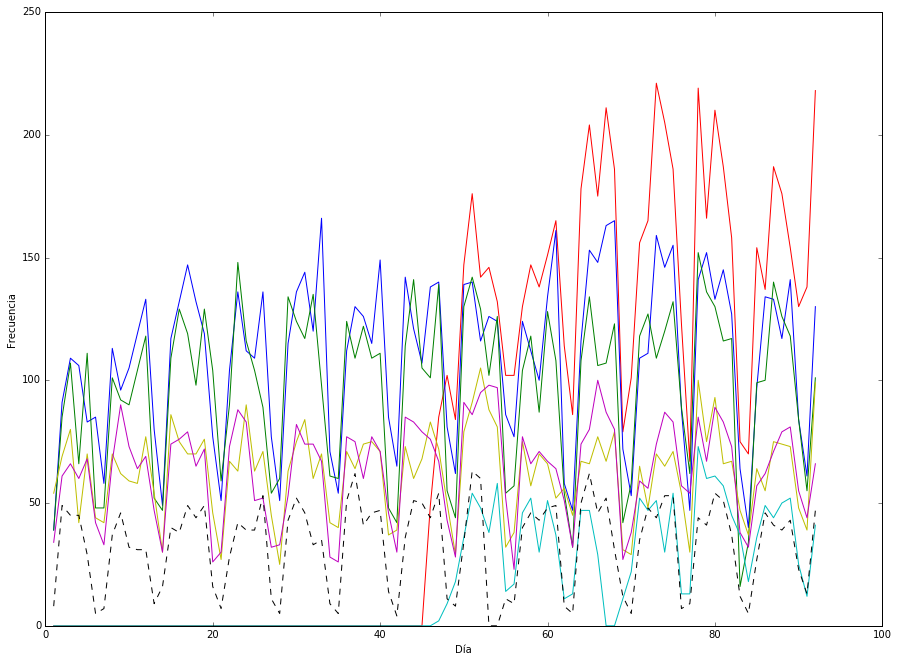

In [39]:
fig1=plt.figure(figsize=(15,11))
plt.plot (S_CS[0][1] , S_CS[0][0], 'r-')  
plt.plot (S_CS[1][1], S_CS[1][0], 'b-')
plt.plot (S_CS[2][1], S_CS[2][0], 'g-') 
plt.plot (S_CS[3][1], S_CS[3][0],'c-') 
#plt.plot (S_CS[4][1], S_CS[4][0],'k-') # Datos de la estación 271
plt.plot (S_CS[5][1], S_CS[5][0], 'y-') 
plt.plot (S_CS[6][1], S_CS[6][0],'m-') 
plt.plot (S_CS[7][1], S_CS[7][0], 'k--')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
#plt.xlim(4.8, 7.3)
#plt.ylim(0, 1000)


Graficamos la frecuencia con la que se usan las ciclo estaciones en las que el aumento es constante. 

En el eje X están los meses (5 = Mayo, 6 = Junio y 7 = Julio) y en el eje Y la frecuencia de uso.

(4.8, 7.3)

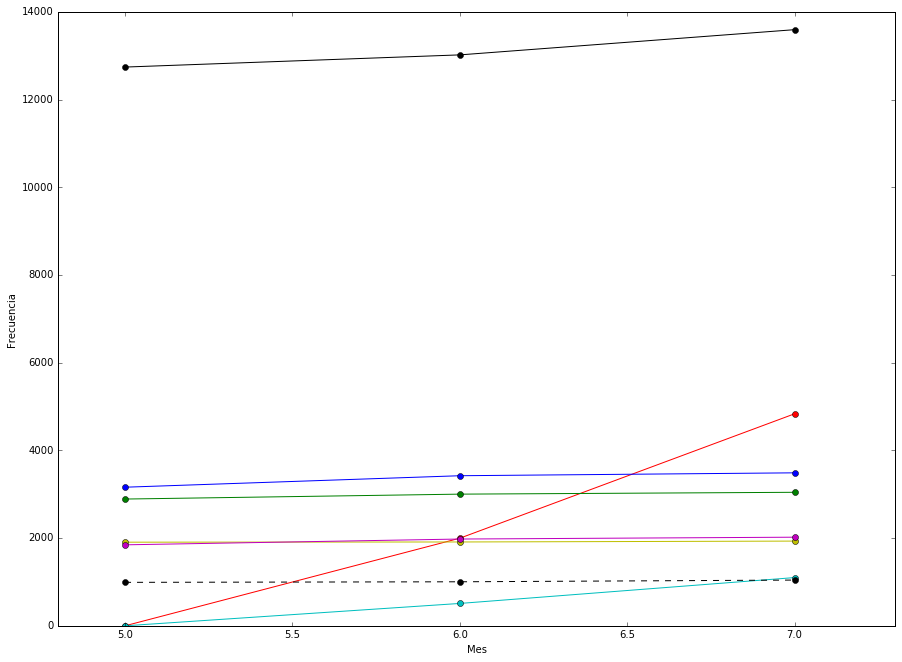

In [67]:
fig1=plt.figure(figsize=(15,11))
plt.plot (mes , S_CS[0][4], 'or-')  
plt.plot (mes, S_CS[1][4], 'ob-')
plt.plot (mes, S_CS[2][4], 'og-') 
plt.plot (mes, S_CS[3][4],'oc-') 
plt.plot (mes, S_CS[4][4],'ok-') 
plt.plot (mes, S_CS[5][4], 'oy-') 
plt.plot (mes, S_CS[6][4],'om-') 
plt.plot (mes, S_CS[7][4], 'ok--')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xlim(4.8, 7.3)
#plt.ylim(0, 1000)

Imprime las estaciones en las que el uso de ecobicis disminuyó de Mayo a Junio pero aumentó de Junio a Julio. Los últimos tres valores indican el uso en Mayo, Junio y Julio respectivamente.

In [32]:
for i in range(0,26):
    print (S_CJnaJl[i][3], S_CJnaJl[i][4] )

('El uso en la estación:', 40, 'Creció de Junio a Julio') (4979, 2127, 3975)
('El uso en la estación:', 70, 'Creció de Junio a Julio') (6511, 5927, 6729)
('El uso en la estación:', 91, 'Creció de Junio a Julio') (1965, 1666, 1671)
('El uso en la estación:', 100, 'Creció de Junio a Julio') (909, 796, 812)
('El uso en la estación:', 105, 'Creció de Junio a Julio') (1376, 1248, 1367)
('El uso en la estación:', 165, 'Creció de Junio a Julio') (3995, 3820, 3880)
('El uso en la estación:', 225, 'Creció de Junio a Julio') (2966, 2286, 2601)
('El uso en la estación:', 233, 'Creció de Junio a Julio') (3323, 3150, 3364)
('El uso en la estación:', 242, 'Creció de Junio a Julio') (7412, 6878, 7074)
('El uso en la estación:', 278, 'Creció de Junio a Julio') (1284, 1031, 1487)
('El uso en la estación:', 286, 'Creció de Junio a Julio') (4049, 3909, 4066)
('El uso en la estación:', 307, 'Creció de Junio a Julio') (1436, 1415, 1452)
('El uso en la estación:', 310, 'Creció de Junio a Julio') (3242, 3152

Graficamos la frecuencia con la que se usan las ciclo estaciones en las que el uso aumentó de Junio a Julio. 

En el eje X están los días y en el eje Y la frecuencia de uso.

(0, 2000)

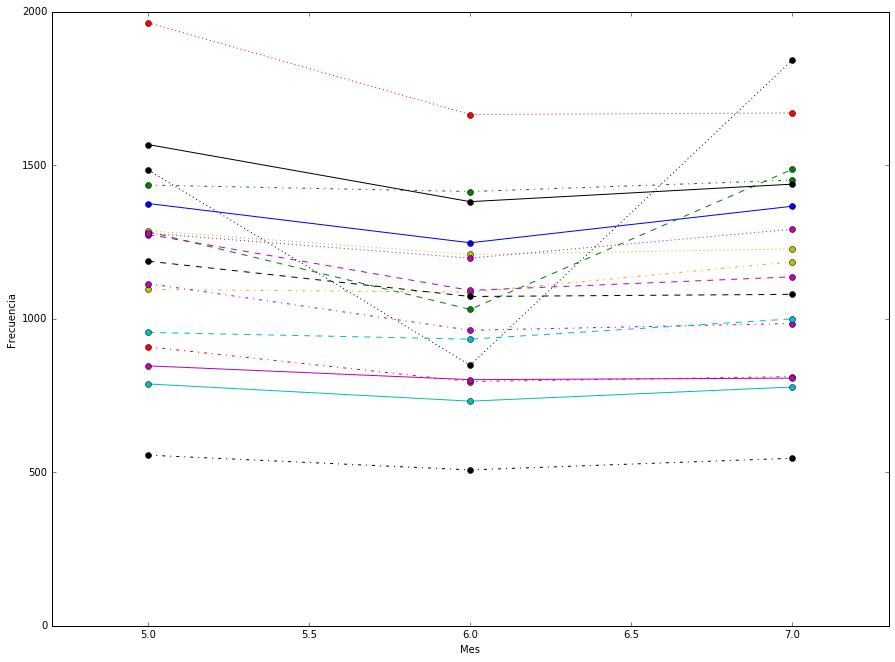

In [20]:
fig1=plt.figure(figsize=(15,11))
plt.plot (mes, S_CJnaJl[0][4], 'or-')
plt.plot (mes, S_CJnaJl[1][4], 'or--')
plt.plot (mes, S_CJnaJl[2][4], 'or:')
plt.plot (mes, S_CJnaJl[3][4], 'or-.')
plt.plot (mes, S_CJnaJl[4][4], 'ob-')
plt.plot (mes, S_CJnaJl[5][4], 'ob--')
plt.plot (mes, S_CJnaJl[6][4], 'ob:')
plt.plot (mes, S_CJnaJl[7][4], 'ob-.')
plt.plot (mes, S_CJnaJl[8][4], 'og-')
plt.plot (mes, S_CJnaJl[9][4], 'og--')
plt.plot (mes, S_CJnaJl[10][4], 'og:')
plt.plot (mes, S_CJnaJl[11][4], 'og-.')
plt.plot (mes, S_CJnaJl[12][4], 'oy-')
plt.plot (mes, S_CJnaJl[13][4], 'oy--')
plt.plot (mes, S_CJnaJl[14][4], 'oy:')
plt.plot (mes, S_CJnaJl[15][4], 'oy-.')
plt.plot (mes, S_CJnaJl[16][4], 'om-')
plt.plot (mes, S_CJnaJl[17][4], 'om--')
plt.plot (mes, S_CJnaJl[18][4], 'om:')
plt.plot (mes, S_CJnaJl[19][4], 'om-.')
plt.plot (mes, S_CJnaJl[20][4], 'ok-')
plt.plot (mes, S_CJnaJl[21][4], 'ok--')
plt.plot (mes, S_CJnaJl[22][4], 'ok:')
plt.plot (mes, S_CJnaJl[23][4], 'ok-.')
plt.plot (mes, S_CJnaJl[24][4], 'oc-')
plt.plot (mes, S_CJnaJl[25][4], 'oc--')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xlim(4.7, 7.3)
plt.ylim(0, 2000)


Graficamos la frecuencia con la que se usan las ciclo estaciones en las que el uso aumentó de Junio a Julio. 

En el eje X están los meses y en el eje Y la frecuencia de uso.

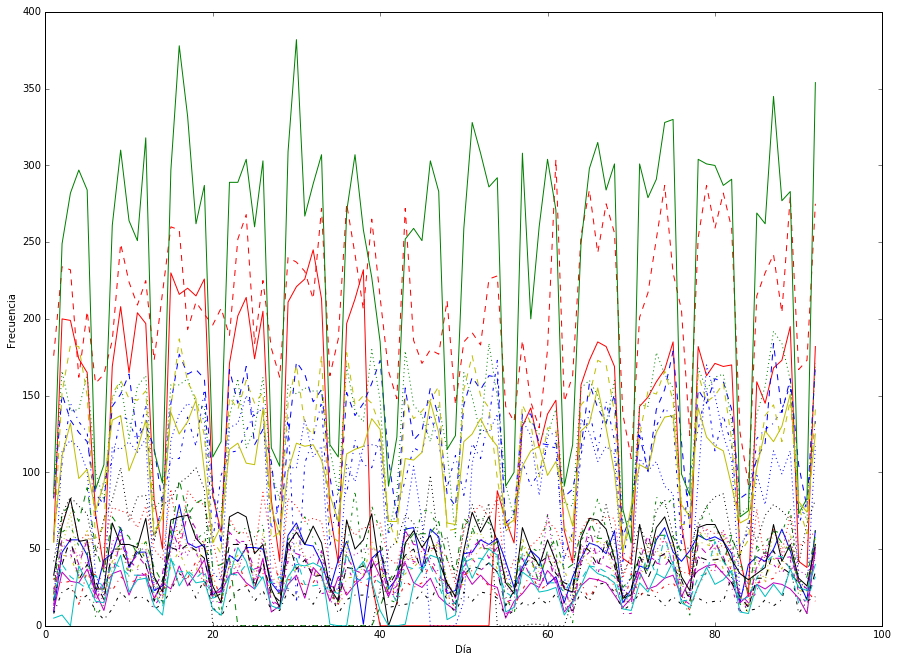

In [40]:
fig1=plt.figure(figsize=(15,11))
plt.plot (S_CJnaJl[0][1], S_CJnaJl[0][0], 'r-')
plt.plot (S_CJnaJl[1][1], S_CJnaJl[1][0], 'r--')
plt.plot (S_CJnaJl[2][1], S_CJnaJl[2][0], 'r:')
plt.plot (S_CJnaJl[3][1], S_CJnaJl[3][0], 'r-.')
plt.plot (S_CJnaJl[4][1], S_CJnaJl[4][0], 'b-')
plt.plot (S_CJnaJl[5][1], S_CJnaJl[5][0], 'b--')
plt.plot (S_CJnaJl[6][1], S_CJnaJl[6][0], 'b:')
plt.plot (S_CJnaJl[7][1], S_CJnaJl[7][0], 'b-.')
plt.plot (S_CJnaJl[8][1], S_CJnaJl[8][0], 'g-')
plt.plot (S_CJnaJl[9][1], S_CJnaJl[9][0], 'g--')
plt.plot (S_CJnaJl[10][1], S_CJnaJl[10][0], 'g:')
plt.plot (S_CJnaJl[11][1], S_CJnaJl[11][0], 'g-.')
plt.plot (S_CJnaJl[12][1], S_CJnaJl[12][0], 'y-')
plt.plot (S_CJnaJl[13][1], S_CJnaJl[13][0], 'y--')
plt.plot (S_CJnaJl[14][1], S_CJnaJl[14][0], 'y:')
plt.plot (S_CJnaJl[15][1], S_CJnaJl[15][0], 'y-.')
plt.plot (S_CJnaJl[16][1], S_CJnaJl[16][0], 'm-')
plt.plot (S_CJnaJl[17][1], S_CJnaJl[17][0], 'm--')
plt.plot (S_CJnaJl[18][1], S_CJnaJl[18][0], 'm:')
plt.plot (S_CJnaJl[19][1], S_CJnaJl[19][0], 'm-.')
plt.plot (S_CJnaJl[20][1], S_CJnaJl[20][0], 'k-')
plt.plot (S_CJnaJl[21][1], S_CJnaJl[21][0], 'k--')
plt.plot (S_CJnaJl[22][1], S_CJnaJl[22][0], 'k:')
plt.plot (S_CJnaJl[23][1], S_CJnaJl[23][0], 'k-.')
plt.plot (S_CJnaJl[24][1], S_CJnaJl[24][0], 'c-')
plt.plot (S_CJnaJl[25][1], S_CJnaJl[25][0], 'c--')
plt.xlabel('Día')
plt.ylabel('Frecuencia')
#plt.xlim(4.7, 7.3)
#plt.ylim(0, 100)


Imprime las estaciones en las que el uso de ecobicis creció de Mayo a Junio pero disminuyó de Junio a Julio. Los últimos tres valores indican el uso en Mayo, Junio y Julio respectivamente.

In [34]:
for i in range(0,149):
    print (S_CMaJn[i][3], S_CMaJn[i][4])

('El uso en la estación:', 2, 'Creció de Mayo a Junio') (5956, 6024, 4917)
('El uso en la estación:', 3, 'Creció de Mayo a Junio') (6797, 6887, 6559)
('El uso en la estación:', 6, 'Creció de Mayo a Junio') (7405, 7429, 6882)
('El uso en la estación:', 8, 'Creció de Mayo a Junio') (3968, 4413, 3870)
('El uso en la estación:', 9, 'Creció de Mayo a Junio') (6138, 6165, 5392)
('El uso en la estación:', 10, 'Creció de Mayo a Junio') (7718, 8064, 7239)
('El uso en la estación:', 14, 'Creció de Mayo a Junio') (6723, 7618, 6017)
('El uso en la estación:', 16, 'Creció de Mayo a Junio') (8772, 9031, 8816)
('El uso en la estación:', 18, 'Creció de Mayo a Junio') (12709, 13639, 12229)
('El uso en la estación:', 20, 'Creció de Mayo a Junio') (8043, 8133, 7039)
('El uso en la estación:', 22, 'Creció de Mayo a Junio') (6387, 6965, 6161)
('El uso en la estación:', 24, 'Creció de Mayo a Junio') (7749, 7985, 7244)
('El uso en la estación:', 26, 'Creció de Mayo a Junio') (6544, 6909, 6389)
('El uso en la

Imprime las estaciones en las que el uso de ecobicis disminuyó de Mayo a Junio de de Junio a Julio. Los últimos tres valores indican el uso en Mayo, Junio y Julio respectivamente.

In [35]:
for i in range(0,264):
    print (S_DS[i][3], S_DS[i][4])

('El uso en la estación:', 1, 'Siempre disminuye') (13860, 13065, 11940)
('El uso en la estación:', 4, 'Siempre disminuye') (5701, 5564, 4746)
('El uso en la estación:', 5, 'Siempre disminuye') (5052, 4792, 4414)
('El uso en la estación:', 7, 'Siempre disminuye') (8295, 8138, 6885)
('El uso en la estación:', 11, 'Siempre disminuye') (5991, 5942, 5337)
('El uso en la estación:', 12, 'Siempre disminuye') (4690, 4309, 3740)
('El uso en la estación:', 13, 'Siempre disminuye') (8624, 8393, 7611)
('El uso en la estación:', 15, 'Siempre disminuye') (10602, 10094, 9448)
('El uso en la estación:', 17, 'Siempre disminuye') (9616, 7600, 7410)
('El uso en la estación:', 19, 'Siempre disminuye') (10225, 9321, 8239)
('El uso en la estación:', 21, 'Siempre disminuye') (10276, 10161, 9539)
('El uso en la estación:', 23, 'Siempre disminuye') (9753, 9603, 8910)
('El uso en la estación:', 25, 'Siempre disminuye') (10757, 10492, 9696)
('El uso en la estación:', 27, 'Siempre disminuye') (20984, 20754, 1922